Hipótesis del análisis de datos del rendimiento estudiantil:
Hipótesis principal:
En esta hipótesis se prevé que los estudiantes con mayor número de horas de estudio, acceso estable a internet y motivación alta tienen un mejor desempeño en las calificaciones de los exámenes, en comparación con aquellos que presentan menores valores en estas variables.
Hipótesis secundarias:

1. ¿Los estudiantes que tienen más horas estudiadas tienen mejor calificación?
2. Los estudiantes que participan en actividades extracurriculares equilibran su rendimiento académico y muestran calificaciones ligeramente mejores que quienes no participan, debido a habilidades organizativas y de gestión del tiempo.
3. ¿Los estudiantes de escuelas privadas obtienen calificaciones más altas en promedio que los de escuelas públicas?
4. ¿Una mayor distancia a la escuela afecta negativamente las calificaciones de los estudiantes?


In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataFrame = pd.read_csv("DataSet/StudentPerformanceFactors.csv")

Limpiando los datos, se remplaza con la mediana para no tender perdidas en las medidas


In [7]:
columns_null_data = dataFrame.columns[dataFrame.isnull().any()].tolist()

for i in columns_null_data:
    dataFrame[i] = dataFrame[i].fillna(dataFrame[i].median)

if(dataFrame.isnull().sum().sum() > 0):
    print("EROOR -> Data frame with null values")

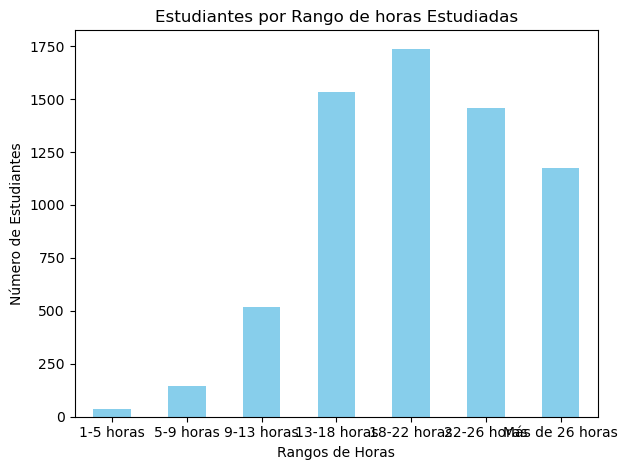

In [6]:

dataFrame['Range_hours'] = pd.cut(
    dataFrame['Hours_Studied'],
    bins=[0, 5, 9, 13,18,22,26, float('inf')],  # Límites de los rangos
    labels=['1-5 horas', '5-9 horas', '9-13 horas', '13-18 horas' ,'18-22 horas','22-26 horas' , 'Más de 26 horas'],  # Etiquetas
    right=False
)

count_range = dataFrame['Range_hours'].value_counts().sort_index()
count_range.plot(kind='bar', color='skyblue', legend =False)
plt.title('Estudiantes por Rango de horas Estudiadas')
plt.xlabel('Rangos de Horas')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La mayoría de los estudiantes estudiaron entre 18 y 22 horas semanales


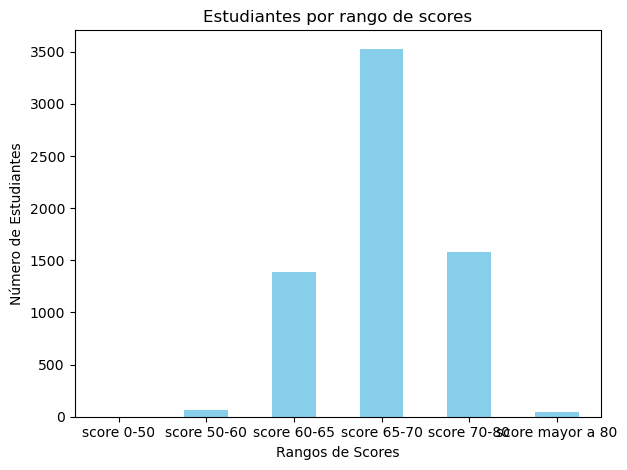

In [8]:

dataFrame['Range_scores'] = pd.cut(
    dataFrame["Exam_Score"],
    bins = [0,50, 60, 65, 70, 80, float('inf')],
    labels = ['score 0-50','score 50-60','score 60-65','score 65-70','score 70-80','score mayor a 80'],
    right = False
)

count_scores = dataFrame['Range_scores'].value_counts().sort_index()
count_scores.plot(kind='bar', color='skyblue', legend =False)
plt.title('Estudiantes por rango de scores')
plt.xlabel('Rangos de Scores')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

La mayoría de los estudiantes tuvieron una calificación entre 65 y 70, posterior mente analizaremos a los estudiantes con calificación en el rango 50-60 y mayor que 80.


C:\Users\alvar\AppData\Local\Temp\ipykernel_18720\3831432736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_por_rango = dataFrame.groupby('Range_hours')['Exam_Score'].mean()


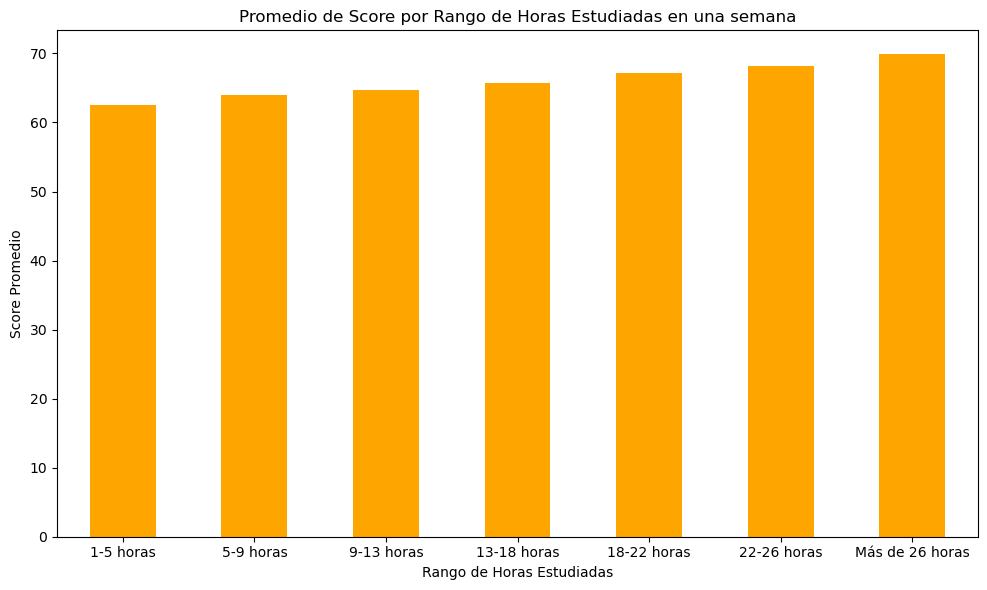

In [7]:
scores_por_rango = dataFrame.groupby('Range_hours')['Exam_Score'].mean()


scores_por_rango.plot(kind='bar', color='orange', figsize=(10, 6))

plt.title('Promedio de Score por Rango de Horas Estudiadas en una semana')
plt.xlabel('Rango de Horas Estudiadas')
plt.ylabel('Score Promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En la grafica se puede observar que mientras mas horas estudiadas tenga el alumno, mayor es su calificación.


C:\Users\alvar\AppData\Local\Temp\ipykernel_18720\4159755408.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_attendance_by = dataFrame.groupby('Range_attendance')['Exam_Score'].mean()


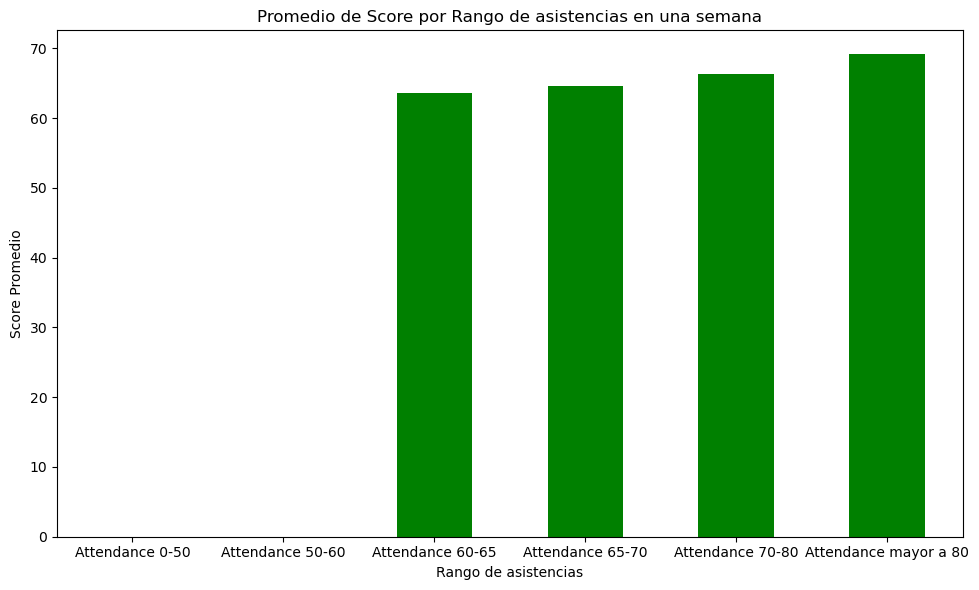

In [8]:

dataFrame['Range_attendance'] = pd.cut(
    dataFrame["Attendance"],
    bins = [0,50, 60, 65, 70, 80, float('inf')],
    labels = ['Attendance 0-50','Attendance 50-60','Attendance 60-65','Attendance 65-70','Attendance 70-80','Attendance mayor a 80'],
    right = False
)
scores_attendance_by = dataFrame.groupby('Range_attendance')['Exam_Score'].mean()
scores_attendance_by.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Promedio de Score por Rango de asistencias en una semana')
plt.xlabel('Rango de asistencias')
plt.ylabel('Score Promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

En este grafico tenemos el mismo comportamiento con la asistencia a clase, los que tuvieron una asistencia mayor a 80 su calificación fue mayor.


C:\Users\alvar\AppData\Local\Temp\ipykernel_17192\3111678573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Distance_from_Home", y="Attendance", data=dataFrame, palette="Set2")


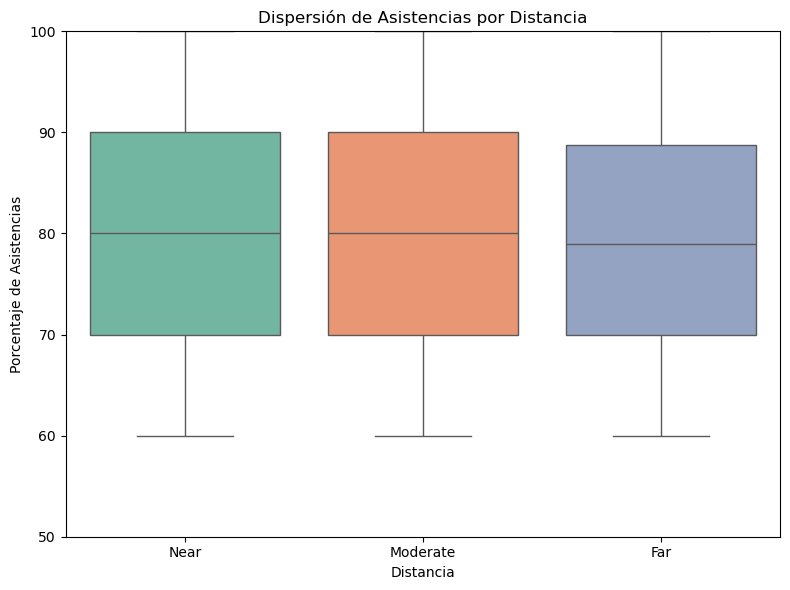

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Distance_from_Home", y="Attendance", data=dataFrame, palette="Set2")

plt.title('Dispersión de Asistencias por Distancia')
plt.xlabel('Distancia')
plt.ylabel('Porcentaje de Asistencias')
plt.ylim(50, 100)
plt.tight_layout()
plt.show()


Podemos observar que la distancia si influye en la asistencia a clase.
